In [1]:
import torch
import torch.nn as nn
import glob
import os
import numpy as np
import tqdm
import functools

from mltools.utils import cuda_tools
device=cuda_tools.get_freer_device()

memory_available [78319]
best GPU: 0


In [2]:
nside_target=128

In [3]:
downsampler=functools.partial(torch.nn.functional.interpolate,size=nside_target,align_corners=False,mode='trilinear')

In [5]:
files=glob.glob("/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/*Go*_Astrid_CV*z=0.0.npy")
files

['/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Go8_Astrid_CV_256_z=0.0.npy',
 '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Go9_Astrid_CV_256_z=0.0.npy',
 '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Go7_Astrid_CV_256_z=0.0.npy']

In [6]:
fol=f"/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_{nside_target}"
os.makedirs(fol,exist_ok=True)

In [7]:
for file in files:
    name=os.path.split(file)[-1]
    #if "_LH_" in name:
    #    continue
    file_to=os.path.join(fol,name.replace("_256_",f"_{nside_target}_"))
    assert file!=file_to, "same file"

    print("loading",name)
    fields=np.load(file)
    down_fields=[]
    if "_LH_" in name:
        batch_size=10
    elif "_CV_" in name:
        batch_size=1
    else:
        batch_size=1
    n=fields.shape[0]
    assert n%batch_size==0, "batch size must divide number of fields"
    n_batch=fields.shape[0]//batch_size
    for i in tqdm.tqdm(range(n_batch),desc=name):
        fields_=fields[i*batch_size:(i+1)*batch_size]
        fields_=torch.tensor(fields_).unsqueeze(1).to(device)
        fields_=downsampler(fields_)
        fields_=fields_.squeeze(1).cpu().numpy()
        assert fields.dtype==np.float32, "fields must be float32"
        down_fields.append(fields_)
    down_fields=np.concatenate(down_fields,axis=0)
    np.save(file_to,down_fields)
    print(name,down_fields.shape,"done.")
    print()
    #break

loading Grids_Go8_Astrid_CV_256_z=0.0.npy


Grids_Go8_Astrid_CV_256_z=0.0.npy: 100%|██████████| 27/27 [00:01<00:00, 20.24it/s]


Grids_Go8_Astrid_CV_256_z=0.0.npy (27, 128, 128, 128) done.

loading Grids_Go9_Astrid_CV_256_z=0.0.npy


Grids_Go9_Astrid_CV_256_z=0.0.npy: 100%|██████████| 27/27 [00:00<00:00, 47.85it/s]


Grids_Go9_Astrid_CV_256_z=0.0.npy (27, 128, 128, 128) done.

loading Grids_Go7_Astrid_CV_256_z=0.0.npy


Grids_Go7_Astrid_CV_256_z=0.0.npy: 100%|██████████| 27/27 [00:00<00:00, 54.86it/s]


Grids_Go7_Astrid_CV_256_z=0.0.npy (27, 128, 128, 128) done.



In [85]:
files=glob.glob(os.path.join(fol,"*"))
files

['/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_176/Grids_Mcdm_Astrid_CV_176_z=0.0.npy',
 '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_176/Grids_Mstar_Astrid_1P_176_z=0.0.npy',
 '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_176/Grids_Mstar_Astrid_CV_176_z=0.0.npy',
 '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_176/Grids_Mcdm_Astrid_1P_176_z=0.0.npy',
 '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_176/Grids_Mstar_Astrid_LH_176_z=0.0.npy',
 '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_176/Grids_Mcdm_Astrid_LH_176_z=0.0.npy']

In [88]:
import matplotlib.pyplot as plt
#fields=down_fields
fields=np.load('/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_176/Grids_Mcdm_Astrid_CV_176_z=0.0.npy')
fields=np.load('/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_176/Grids_Mstar_Astrid_CV_176_z=0.0.npy')
fields.shape

(27, 176, 176, 176)

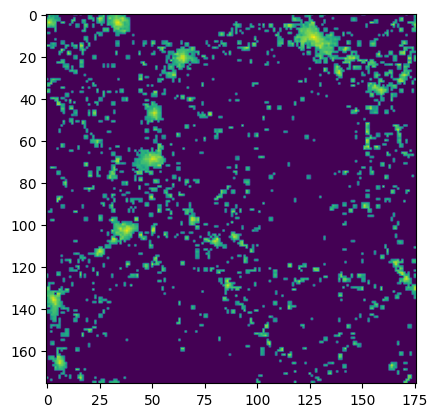

In [89]:
plt.imshow(np.roll(np.log10(fields[0,:48].sum(0)+1),(64,64),axis=(0,1)))

In [62]:
35*(4/4)*(160/128)**3

68.359375

In [77]:
35*(3/4)*(176/128)**3

68.23974609375